# 1.1 Numpy

## 1.1.1 Array

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([i for i in range(10)])
print(x.__class__)
print(x.shape)
print(x.ndim)

<class 'numpy.ndarray'>
(10,)
1


In [3]:
W = np.array([[i for i in range(10)], [i for i in range(10)]])
print(W.shape)
print(W.ndim)

(2, 10)
2


## 1.1.2 Element Wise

In [4]:
W = np.array([[0, 0, 0], [1, 1, 1]])
X = np.array([[1, 2, 3], [4, 5, 6]])
print(W + X)
print(W - X)
print(W * X)
print(W / X)
print(W // X)
print(X / W)

[[1 2 3]
 [5 6 7]]
[[-1 -2 -3]
 [-3 -4 -5]]
[[0 0 0]
 [4 5 6]]
[[0.         0.         0.        ]
 [0.25       0.2        0.16666667]]
[[0 0 0]
 [0 0 0]]
[[inf inf inf]
 [ 4.  5.  6.]]


/Users/wuling31715/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


## 1.1.3 Broadcast

In [5]:
A = np.array([[0, 1], [2, 3]])
print(A + 10)
print(A * 10)

[[10 11]
 [12 13]]
[[ 0 10]
 [20 30]]


In [6]:
b = np.array([10, 20])
print(A + b)
print(A * b)

[[10 21]
 [12 23]]
[[ 0 20]
 [20 60]]


## 1.1.4 Dot

In [7]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print(np.dot(a, b))

32


In [8]:
b = np.array([[4], [5], [6]])
print(np.dot(a, b))

[32]


In [9]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[1, 0], [0, 1]])
print(np.dot(A, B))

[[1 2]
 [3 4]]


## 1.1.5 Shape

In [10]:
a = np.array([1, 2, 3])
b = np.array([[4], [5], [6]])
c = a * b # Broadcast
print(c)
print(c.shape)

[[ 4  8 12]
 [ 5 10 15]
 [ 6 12 18]]
(3, 3)


In [11]:
d = np.dot(a, b) # Dot
print(d)
print(d.shape)

[32]
(1,)


# 1.2 Theory of Neural Network

## 1.2.1 Concept of Neural Network

In [12]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [13]:
x = np.random.randn(10, 2) # 輸入
W1 = np.random.randn(2, 4) # 權重
b1 = np.random.randn(4) # 偏權值 
h = np.dot(x, W1) + b1
W2 = np.random.randn(4, 3) # 權重
b2 = np.random.randn(3) # 偏權值 
a = sigmoid(h)
s = np.dot(a, W2) + b2
print('x:\n{}\n'.format(x))
print('W1:\n{}\n'.format(W1))
print('b1:\n{}\n'.format(b1))
print('h:\n{}\n'.format(h))
print('a:\n{}\n'.format(a))
print('W2:\n{}\n'.format(W2))
print('b2:\n{}\n'.format(b2))
print('s:\n{}\n'.format(s))

x:
[[-2.06721981  1.97282512]
 [ 0.28738507  1.13250305]
 [-1.3823915   0.75118325]
 [-1.51582219 -0.06993043]
 [-0.49547275  0.51852691]
 [-0.94229068 -0.77023301]
 [ 0.99705212  0.22007966]
 [ 0.56146814  1.98982745]
 [ 1.36005196 -0.91696416]
 [ 0.3365922  -1.27284961]]

W1:
[[ 0.93596046 -0.90371138 -1.18344245 -1.35952548]
 [-0.25066393 -0.43860798  1.29041261 -0.21804564]]

b1:
[-0.43968243  0.91744613  1.23375836 -1.86788835]

h:
[[-2.86903453  1.92031936  6.22595244  0.51238375]
 [-0.45457904  0.1610081   2.35505089 -2.50553303]
 [-1.92184076  1.83725409  3.83907548 -0.15228411]
 [-1.84090302  2.31798394  2.93740758  0.20815857]
 [-1.03340132  1.13778045  2.4892355  -1.30734306]
 [-1.1285596   2.10683528  1.35498675 -0.41887422]
 [ 0.4383529  -0.08012991  0.33779812 -3.27139352]
 [-0.41294842 -0.46271321  3.13699156 -3.06509179]
 [ 1.06312227  0.0905395  -1.55904698 -3.51697361]
 [ 0.19441206  1.17154592 -0.80708033 -2.04795473]]

a:
[[0.0537057  0.87217404 0.99802646 0.6253651

## 1.2.2 Forward Propagation

In [14]:
class Sigmoid:
    def __init__(self):
        self.params = list()
        
    def forward(self, x):
        return 1 / (1+np.exp(-x))

In [15]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        
    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        return out

In [16]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        # 初始化權重、偏移值
        I, H, O = input_size, hidden_size, output_size        
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)
        # 連接各層神經網路
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        # 儲存參數
        self.params = list()
        for layer in self.layers:
            self.params += layer.params
            
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

In [17]:
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)
print('x:\n{}\n'.format(x))
print('s:\n{}\n'.format(s))

x:
[[ 1.25339704  2.02017362]
 [ 0.81813057  0.72957152]
 [ 0.54042076 -0.02010174]
 [ 0.11334406 -1.79588068]
 [ 2.11268544 -0.11487169]
 [-0.26479194 -0.61846225]
 [-1.10262955  1.11833089]
 [-0.19551341 -0.2821407 ]
 [ 1.33814755  1.99399557]
 [-0.73484729 -1.08441827]]

s:
[[ 0.2643271   2.11570757  0.89155978]
 [ 0.09495751  2.56944416  0.79812893]
 [-0.0508666   2.91067345  0.7512857 ]
 [-0.36238028  3.50132028  0.61251644]
 [ 0.2007799   1.71806697  0.75775973]
 [-0.3107278   3.66904774  0.59498498]
 [-0.31836924  4.00285375  0.49141354]
 [-0.25558387  3.57122285  0.6375811 ]
 [ 0.26940156  2.06071533  0.89190026]
 [-0.45453089  4.04429361  0.38535796]]



# 1.3 Learning of Neural Network 

## 1.3.1 Loss Function

In [18]:
class SigmoidWithLoss:
    def __init__(self):
        self.params = list()
        self.grads = list()
        self.loss = None
        self.y = None  
        self.t = None 

    def forward(self, x, t):
        self.t = t
        self.y = 1 / (1 + np.exp(-x))

        self.loss = cross_entropy_error(np.c_[1 - self.y, self.y], self.t)

        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]

        dx = (self.y - self.t) * dout / batch_size
        return dx

## 1.3.2 Gradient

$ \frac{\partial L}{\partial X} = (\frac{\partial L}{\partial x_1}, \frac{\partial L}{\partial x_2}... \frac{\partial L}{\partial x_n}) $

## 1.3.3 Chain Lule

$ \frac{\partial X}{\partial Z} = \frac{\partial X}{\partial Y} \frac{\partial Y}{\partial Z} $

## 1.3.4 Computation Graph

### 1.3.4.1 Multiplication

### 1.3.4.2 Branch

### 1.3.4.3 Repeat

In [19]:
D = 8
N = 7
x = np.random.randn(1, D)
y = np.repeat(x, N, axis=0) # forward
dy = np.random.randn(N, D) # gradient
dx = np.sum(dy, axis=0, keepdims=True) # backward
print("x:\n{}\n".format(x))
print("y:\n{}\n".format(y))
print("dy:\n{}\n".format(dy))
print("dx:\n{}\n".format(dx))

x:
[[ 0.05530676 -0.12877373  0.7293361   0.05833367  0.95909968  0.32135287
  -0.43866585  0.33987388]]

y:
[[ 0.05530676 -0.12877373  0.7293361   0.05833367  0.95909968  0.32135287
  -0.43866585  0.33987388]
 [ 0.05530676 -0.12877373  0.7293361   0.05833367  0.95909968  0.32135287
  -0.43866585  0.33987388]
 [ 0.05530676 -0.12877373  0.7293361   0.05833367  0.95909968  0.32135287
  -0.43866585  0.33987388]
 [ 0.05530676 -0.12877373  0.7293361   0.05833367  0.95909968  0.32135287
  -0.43866585  0.33987388]
 [ 0.05530676 -0.12877373  0.7293361   0.05833367  0.95909968  0.32135287
  -0.43866585  0.33987388]
 [ 0.05530676 -0.12877373  0.7293361   0.05833367  0.95909968  0.32135287
  -0.43866585  0.33987388]
 [ 0.05530676 -0.12877373  0.7293361   0.05833367  0.95909968  0.32135287
  -0.43866585  0.33987388]]

dy:
[[-0.9339893   0.27970392  1.94600405  1.92935235 -2.35081066  0.73421348
  -0.87314214  0.21075248]
 [ 0.56996973 -0.66709586 -1.11008894  0.38279732 -0.67291902 -0.91085586
   

### 1.3.4.4 Sum

In [20]:
D = 8
N = 7
x = np.random.randn(N, D)
y = np.sum(x, axis=0, keepdims=True) # forward
dy = np.random.randn(1, D) # gradient
dx = np.repeat(dy, N, axis=0) # backward
print("x:\n{}\n".format(x))
print("y:\n{}\n".format(y))
print("dy:\n{}\n".format(dy))
print("dx:\n{}\n".format(dx))

x:
[[-0.97662744  0.27308195  0.39651829  0.33179009  0.49993151 -0.45942679
  -1.43253174 -0.8337642 ]
 [-1.1870163  -0.34680265  0.0148151  -1.22228957 -1.03247516  0.64534827
   0.55765196 -1.91298088]
 [-0.61104301 -0.66141661 -0.94025777  0.51446028 -0.71777977  1.4256094
   0.87351222 -1.25727023]
 [-1.19960987 -0.30013072  0.40173273 -0.20535769 -0.2897443  -1.0807846
   1.27791282 -1.8847578 ]
 [ 1.35586086 -0.20896635 -0.35762584  0.78703375  0.14249148 -0.42574724
  -0.99451465 -0.19464628]
 [-0.82567224 -1.06417842 -2.7447425  -1.40197213  0.03353918  2.39843362
   0.87370855 -0.96578638]
 [ 0.64728856  0.2234113   0.78190556  0.14732863  1.13979631 -0.80029844
  -0.51435261  0.44491655]]

y:
[[-2.79681945 -2.0850015  -2.44765443 -1.04900664 -0.22424075  1.70313423
   0.64138656 -6.60428922]]

dy:
[[-0.79879062  0.19412818  0.28786842  0.08942156 -0.18249557 -0.76707749
   1.7544245   2.7155227 ]]

dx:
[[-0.79879062  0.19412818  0.28786842  0.08942156 -0.18249557 -0.76707749

### 1.3.4.5 MatMul

In [21]:
class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None

    def forward(self, x):
        W, = self.params
        out = np.dot(x, W)
        self.x = x
        return out

    def backward(self, dout):
        W, = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        self.grads[0][...] = dW
        return dx

## 1.3.5 Backward Propagation

### 1.3.5.1 Sigmoid 

In [22]:
class Sigmoid:
    def __init__(self):
        self.params = list()
        self.grads = list()
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx

### 1.3.5.2 Affine 

In [23]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None

    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        self.x = x
        return out

    def backward(self, dout):
        W, b = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        db = np.sum(dout, axis=0)

        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx

### 1.3.5.3 Softmax with Loss

In [24]:
class SoftmaxWithLoss:
    def __init__(self):
        self.params = list()
        self.grads = list()
        self.y = None  
        self.t = None  

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)

        if self.t.size == self.y.size:
            self.t = self.t.argmax(axis=1)

        loss = cross_entropy_error(self.y, self.t)
        return loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]

        dx = self.y.copy()
        dx[np.arange(batch_size), self.t] -= 1
        dx *= dout
        dx = dx / batch_size

        return dx

## 1.3.6 Updating Weight

In [25]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]

In [26]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = []
            for param in params:
                self.v.append(np.zeros_like(param))

        for i in range(len(params)):
            self.v[i] = self.momentum * self.v[i] - self.lr * grads[i]
            params[i] += self.v[i]

In [27]:
class Nesterov:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = []
            for param in params:
                self.v.append(np.zeros_like(param))

        for i in range(len(params)):
            self.v[i] *= self.momentum
            self.v[i] -= self.lr * grads[i]
            params[i] += self.momentum * self.momentum * self.v[i]
            params[i] -= (1 + self.momentum) * self.lr * grads[i]

In [28]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = []
            for param in params:
                self.h.append(np.zeros_like(param))

        for i in range(len(params)):
            self.h[i] += grads[i] * grads[i]
            params[i] -= self.lr * grads[i] / (np.sqrt(self.h[i]) + 1e-7)

In [29]:
class RMSprop:
    def __init__(self, lr=0.01, decay_rate = 0.99):
        self.lr = lr
        self.decay_rate = decay_rate
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = []
            for param in params:
                self.h.append(np.zeros_like(param))

        for i in range(len(params)):
            self.h[i] *= self.decay_rate
            self.h[i] += (1 - self.decay_rate) * grads[i] * grads[i]
            params[i] -= self.lr * grads[i] / (np.sqrt(self.h[i]) + 1e-7)

In [30]:
class Adam:
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = [], []
            for param in params:
                self.m.append(np.zeros_like(param))
                self.v.append(np.zeros_like(param))
        
        self.iter += 1
        lr_t = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)

        for i in range(len(params)):
            self.m[i] += (1 - self.beta1) * (grads[i] - self.m[i])
            self.v[i] += (1 - self.beta2) * (grads[i]**2 - self.v[i])            
            params[i] -= lr_t * self.m[i] / (np.sqrt(self.v[i]) + 1e-7)

# 1.4 Solving Problem Neural Network 

## 1.4.1 Loading Datasets

In [31]:
class Spiral:
    def load_data(seed=1984):
        np.random.seed()
        N = 100  
        DIM = 2  
        CLS_NUM = 3 

        x = np.zeros((N*CLS_NUM, DIM)) # 輸入資料
        t = np.zeros((N*CLS_NUM, CLS_NUM), dtype=np.int) # 標籤資料

        for j in range(CLS_NUM):
            for i in range(N):
                rate = i / N
                radius = 1.0*rate
                theta = j*4.0 + 4.0*rate + np.random.randn()*0.2

                ix = N*j + i
                x[ix] = np.array([radius*np.sin(theta),
                                  radius*np.cos(theta)]).flatten()
                t[ix, j] = 1

        return x, t

x: (300, 2)
t: (300, 3)


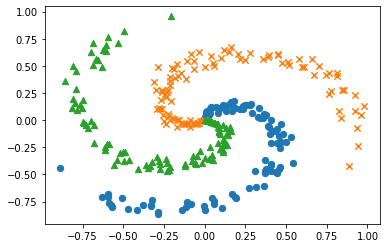

In [32]:
spiral = Spiral()
x, t = spiral.load_data()
print('x:', x.shape)  
print('t:', t.shape)  

N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']

for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

## 1.4.2 Building Neural Network

In [33]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None

    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        self.x = x
        return out

    def backward(self, dout):
        W, b = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        db = np.sum(dout, axis=0)

        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx

In [34]:
class Sigmoid:
    def __init__(self):
        self.params = list()
        self.grads = list()
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx

In [35]:
def softmax(x):
    if x.ndim == 2:
        x = x - x.max(axis=1, keepdims=True)
        x = np.exp(x)
        x /= x.sum(axis=1, keepdims=True)
    elif x.ndim == 1:
        x = x - np.max(x)
        x = np.exp(x) / np.sum(np.exp(x))
    return x

In [36]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]

    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [37]:
class SoftmaxWithLoss:
    def __init__(self):
        self.params = list()
        self.grads = list()
        self.y = None  
        self.t = None  

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)

        if self.t.size == self.y.size:
            self.t = self.t.argmax(axis=1)

        loss = cross_entropy_error(self.y, self.t)
        return loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]

        dx = self.y.copy()
        dx[np.arange(batch_size), self.t] -= 1
        dx *= dout
        dx = dx / batch_size

        return dx

In [38]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)

        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()

        self.params = list()
        self.grads = list()
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

In [39]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]

## 1.4.3 Training Neural Network

| epoch 1    | iter 10 / 10   | loss1.1962232339699368
| epoch 11   | iter 10 / 10   | loss1.1446987108793667
| epoch 21   | iter 10 / 10   | loss1.1574469818507727
| epoch 31   | iter 10 / 10   | loss1.1513216340915793
| epoch 41   | iter 10 / 10   | loss1.116945222484044
| epoch 51   | iter 10 / 10   | loss1.1347764942418754
| epoch 61   | iter 10 / 10   | loss1.1296780681122358
| epoch 71   | iter 10 / 10   | loss1.1336768478573798
| epoch 81   | iter 10 / 10   | loss1.1538002230757705
| epoch 91   | iter 10 / 10   | loss1.132612712712834
| epoch 101  | iter 10 / 10   | loss1.0967786601243574
| epoch 111  | iter 10 / 10   | loss1.1052561516285173
| epoch 121  | iter 10 / 10   | loss1.0671027765188428
| epoch 131  | iter 10 / 10   | loss1.0128400814051952
| epoch 141  | iter 10 / 10   | loss0.9720262798882414
| epoch 151  | iter 10 / 10   | loss0.9221343856891602
| epoch 161  | iter 10 / 10   | loss0.8864014954457037
| epoch 171  | iter 10 / 10   | loss0.8701430718028129
| epoch 181 

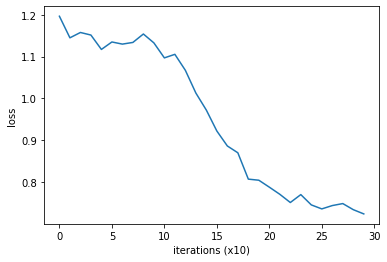

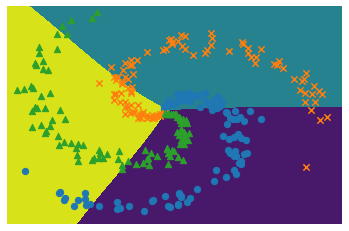

In [40]:
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    if epoch % 10 == 0:
        idx = np.random.permutation(data_size)
        x = x[idx]
        t = t[idx]

        for iters in range(max_iters):
            batch_x = x[iters*batch_size:(iters+1)*batch_size]
            batch_t = t[iters*batch_size:(iters+1)*batch_size]

            loss = model.forward(batch_x, batch_t)
            model.backward()
            optimizer.update(model.params, model.grads)

            total_loss += loss
            loss_count += 1

            if (iters+1) % 10 == 0:
                avg_loss = total_loss / loss_count
    #             print('| epoch %d |  iter %d / %d | loss %.2f' % (epoch + 1, iters + 1, max_iters, avg_loss))
                print('| epoch {:<5}| iter {} / {:<5}| loss{}'.format(epoch + 1, iters + 1, max_iters, avg_loss))
                loss_list.append(avg_loss)
                total_loss = 0
                loss_count = 0

plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('iterations (x10)')
plt.ylabel('loss')
plt.show()

h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

## 1.4.4 Trainer Class

In [41]:
import time

In [42]:
def remove_duplicate(params, grads):
    params, grads = params[:], grads[:]  

    while True:
        find_flg = False
        L = len(params)

        for i in range(0, L - 1):
            for j in range(i + 1, L):
                if params[i] is params[j]:
                    grads[i] += grads[j]  
                    find_flg = True
                    params.pop(j)
                    grads.pop(j)
                elif params[i].ndim == 2 and params[j].ndim == 2 and \
                     params[i].T.shape == params[j].shape and np.all(params[i].T == params[j]):
                    grads[i] += grads[j].T
                    find_flg = True
                    params.pop(j)
                    grads.pop(j)

                if find_flg: break
            if find_flg: break

        if not find_flg: break

    return params, grads

In [43]:
class Trainer:
    def __init__(self, model, optimizer):
        self.model = model
        self.optimizer = optimizer
        self.loss_list = []
        self.eval_interval = None
        self.current_epoch = 0

    def fit(self, x, t, max_epoch=10, batch_size=32, max_grad=None, eval_interval=20):
        data_size = len(x)
        max_iters = data_size // batch_size
        self.eval_interval = eval_interval
        model, optimizer = self.model, self.optimizer
        total_loss = 0
        loss_count = 0

        start_time = time.time()
        for epoch in range(max_epoch):
            if epoch % 10 == 0:
                idx = np.random.permutation(np.arange(data_size))
                x = x[idx]
                t = t[idx]

                for iters in range(max_iters):
                    batch_x = x[iters*batch_size:(iters+1)*batch_size]
                    batch_t = t[iters*batch_size:(iters+1)*batch_size]

                    loss = model.forward(batch_x, batch_t)
                    model.backward()
                    params, grads = remove_duplicate(model.params, model.grads)
                    if max_grad is not None:
                        clip_grads(grads, max_grad)
                    optimizer.update(params, grads)
                    total_loss += loss
                    loss_count += 1

                    if (eval_interval is not None) and (iters % eval_interval) == 0:
                        avg_loss = total_loss / loss_count
                        elapsed_time = time.time() - start_time
#                         print('| epoch %d |  iter %d / %d | time %d[s] | loss %.2f' % (self.current_epoch + 1, iters + 1, max_iters, elapsed_time, avg_loss))
                        print('| epoch {:<5} |  iter {} / {:<5} | time {:<25} | loss {}'.format(self.current_epoch + 1, iters + 1, max_iters, elapsed_time, avg_loss))
                        self.loss_list.append(float(avg_loss))
                        total_loss = 0
                        loss_count = 0

                self.current_epoch += 1
            
    def plot(self, ylim=None):
        x = np.arange(len(self.loss_list))
        if ylim is not None:
            plt.ylim(*ylim)
        plt.plot(x, self.loss_list, label='train')
        plt.xlabel('iterations (x' + str(self.eval_interval) + ')')
        plt.ylabel('loss')
        plt.show()

| epoch 1     |  iter 1 / 10    | time 0.0008478164672851562     | loss 1.0997713661372568
| epoch 2     |  iter 1 / 10    | time 0.007235050201416016      | loss 1.1228995094325227
| epoch 3     |  iter 1 / 10    | time 0.012418985366821289      | loss 1.1120204058284702
| epoch 4     |  iter 1 / 10    | time 0.016974210739135742      | loss 1.1806729395302684
| epoch 5     |  iter 1 / 10    | time 0.025200843811035156      | loss 1.1215036349885739
| epoch 6     |  iter 1 / 10    | time 0.030220985412597656      | loss 1.135255374085502
| epoch 7     |  iter 1 / 10    | time 0.03314495086669922       | loss 1.1408739707165618
| epoch 8     |  iter 1 / 10    | time 0.036663055419921875      | loss 1.1256009426258469
| epoch 9     |  iter 1 / 10    | time 0.03924989700317383       | loss 1.166718477782282
| epoch 10    |  iter 1 / 10    | time 0.04325985908508301       | loss 1.1153724996622505
| epoch 11    |  iter 1 / 10    | time 0.047477006912231445      | loss 1.109044150931421
| 

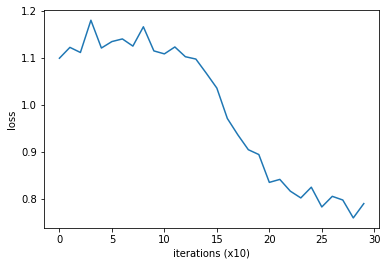

In [44]:
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval=10)
trainer.plot()

# 1.5 High Speed Computing 

## 1.5.1  Floating-Point

In [45]:
a = np.random.randn(0)
print(a.dtype)

float64


In [46]:
b = np.random.randn(0).astype(np.float32)
print(b.dtype)

float32


In [47]:
c = np.random.randn(0).astype(np.float16)
print(c.dtype)

float16


In [48]:
d = np.random.randn(0).astype(np.float128)
print(d.dtype)

float128


## 1.5.2 GPU

In [49]:
# import cupy as cp
# from common import config
# config.GPU = True